Extract Frames from video

In [ ]:
import cv2 
import os 
import math
try:
	# creating a folder named data |
	if not os.path.exists('video_data1'): 
		os.makedirs('video_data1') 
# if not created then raise error 
except OSError: 
	print ('Error: Creating directory of data')
videoFile = "/content/Tom as Obito & Jerry as Minato epic fight.mp4"
imagesFolder = "./video_data1"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
c=0
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename = imagesFolder + "/frame" +  str(int(c)) + ".jpg"
        c+=1
        print ('Creating...' + "/frame" +  str(int(frameId/30))) 
        cv2.imwrite(filename, frame)
cap.release()

Creating.../frame0
Creating.../frame1
Creating.../frame2
Creating.../frame3
Creating.../frame4
Creating.../frame5
Creating.../frame6
Creating.../frame7
Creating.../frame8
Creating.../frame9
Creating.../frame10
Creating.../frame11
Creating.../frame12
Creating.../frame13
Creating.../frame14
Creating.../frame15
Creating.../frame16
Creating.../frame17
Creating.../frame18
Creating.../frame19
Creating.../frame20
Creating.../frame21
Creating.../frame22
Creating.../frame23
Creating.../frame24
Creating.../frame25
Creating.../frame26
Creating.../frame27
Creating.../frame28
Creating.../frame29
Creating.../frame30
Creating.../frame31
Creating.../frame32
Creating.../frame33
Creating.../frame34
Creating.../frame35
Creating.../frame36
Creating.../frame37
Creating.../frame38
Creating.../frame39
Creating.../frame40
Creating.../frame41
Creating.../frame42
Creating.../frame43
Creating.../frame44
Creating.../frame45
Creating.../frame46
Creating.../frame47
Creating.../frame48
Creating.../frame49
Creating..

In [ ]:
from zipfile import ZipFile
opath = '/content/Train_480_280.zip'
file_name = opath

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [ ]:
from zipfile import ZipFile
opath = '/content/Test_480_280.zip'
file_name = opath

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


**Tom and Jerry Detection Model**

In [ ]:
from zipfile import ZipFile
opath = '/content/Data_150.zip'
file_name = opath

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import os

In [ ]:
opath = '/content/Data_150/content/Data_150'
Datadir = opath
categories = ['Unknown','Tom']
im_size = 80
train_data = []
for caty in categories:
  hpath = os.path.join(Datadir,caty)
  lab = categories.index(caty)
  for im in os.listdir(hpath):
    try:
      path = os.path.join(hpath,im)
      img = cv2.imread(path)
      img = cv2.resize(img,(im_size,im_size))
      img.astype('float32')
      train_data.append([img,lab])
    except cv2.error as e:
      print("invalid Frame")


In [ ]:
x = []
y = []
for p,q in train_data:
  x.append(p)
  y.append(q)
train_x = np.asarray(x).astype('float32')
train_y = np.asarray(y)
print(train_x.shape)
print(train_y.shape)

(1459, 80, 80, 3)
(1459,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_x)

In [ ]:


from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
from tensorflow.keras.applications import ResNet50
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(80,80,3), pooling='avg')

model=Sequential()
model.add(base_model)

model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 24,112,770
Trainable params: 24,059,650
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
'''
#from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model=InceptionV3(include_top=False, weights='imagenet',input_shape=(80,80,3), pooling='avg')

model=Sequential()
model.add(base_model)

model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()
'''

"\n#from tensorflow.keras.applications import MobileNet\nfrom tensorflow.keras.applications.vgg19 import VGG19\n#from tensorflow.keras.applications.inception_v3 import InceptionV3\n\nbase_model=InceptionV3(include_top=False, weights='imagenet',input_shape=(80,80,3), pooling='avg')\n\nmodel=Sequential()\nmodel.add(base_model)\n\nmodel.add(Dense(256,activation='relu'))\nmodel.add(Dense(2,activation='softmax'))\n\nmodel.summary()\n"

In [ ]:
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

base_model.trainable=False

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]
    


model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit_generator(datagen.flow(train_x, to_categorical(train_y,2)),
                    epochs=12,callbacks=callbacks)

<ipython-input-13-888543b5bdb3>:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(train_x, to_categorical(train_y,2)),


Epoch 1/12
46/46 [==============================] - 16s 85ms/step - loss: 0.5603 - accuracy: 0.8451 - lr: 0.0010
Epoch 2/12
46/46 [==============================] - 3s 65ms/step - loss: 0.1283 - accuracy: 0.9472 - lr: 0.0010
Epoch 3/12
46/46 [==============================] - 3s 63ms/step - loss: 0.1202 - accuracy: 0.9472 - lr: 0.0010
Epoch 4/12
46/46 [==============================] - 3s 68ms/step - loss: 0.1081 - accuracy: 0.9602 - lr: 0.0010
Epoch 5/12
46/46 [==============================] - 4s 87ms/step - loss: 0.0897 - accuracy: 0.9623 - lr: 0.0010
Epoch 6/12
46/46 [==============================] - 3s 64ms/step - loss: 0.0730 - accuracy: 0.9719 - lr: 0.0010
Epoch 7/12
46/46 [==============================] - 3s 64ms/step - loss: 0.0529 - accuracy: 0.9808 - lr: 0.0010
Epoch 8/12
46/46 [==============================] - 3s 63ms/step - loss: 0.0435 - accuracy: 0.9849 - lr: 0.0010
Epoch 9/12
46/46 [==============================] - 4s 87ms/step - loss: 0.0518 - accuracy: 0.9815 - lr

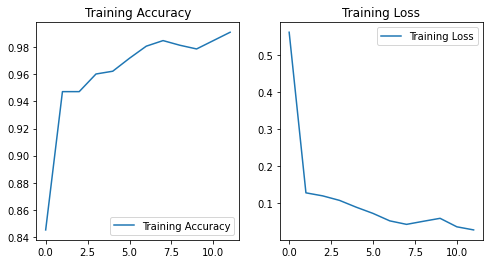

In [ ]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(12)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

**Emotion Detection Model**

In [ ]:
from zipfile import ZipFile
opath = '/content/Emotion_Detection.zip'
file_name = opath

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [ ]:
opath = '/content/Emotion_Detection/Data'
Datadir = opath
categories = ['Happy','Sad','Angry','Suprised','Unknown']
im_size = 100
train_data = []
for caty in categories:
  hpath = os.path.join(Datadir,caty)
  lab = categories.index(caty)
  for im in os.listdir(hpath):
    try:
      path = os.path.join(hpath,im)
      img = cv2.imread(path)
      img = cv2.resize(img,(im_size,im_size))
      img.astype('float32')
      train_data.append([img,lab])
    except cv2.error as e:
      print("invalid Frame")



In [ ]:
x = []
y = []
for p,q in train_data:
  x.append(p)
  y.append(q)
train_x = np.asarray(x).astype('float32')
train_y = np.asarray(y)
print(train_x.shape)
print(train_y.shape)

(719, 100, 100, 3)
(719,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_x)

In [ ]:
from tensorflow.keras.applications import ResNet50
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(100,100,3), pooling='avg')

Emodel=Sequential()
Emodel.add(base_model)

Emodel.add(Dense(256,activation='relu'))
Emodel.add(Dense(5,activation='softmax'))

Emodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 24,113,541
Trainable params: 24,060,421
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
'''
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.vgg19 import VGG19


from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model=InceptionV3(include_top=False, weights='imagenet',input_shape=(100,100,3), pooling='avg')

Emodel=Sequential()
Emodel.add(base_model)

Emodel.add(Dense(256,activation='relu'))
Emodel.add(Dense(5,activation='softmax'))

Emodel.summary()

'''

"\nfrom tensorflow.keras.applications import MobileNet\nfrom tensorflow.keras.applications.vgg19 import VGG19\n\n\nfrom tensorflow.keras.applications.inception_v3 import InceptionV3\n\nbase_model=InceptionV3(include_top=False, weights='imagenet',input_shape=(100,100,3), pooling='avg')\n\nEmodel=Sequential()\nEmodel.add(base_model)\n\nEmodel.add(Dense(256,activation='relu'))\nEmodel.add(Dense(5,activation='softmax'))\n\nEmodel.summary()\n\n"

In [ ]:
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

base_model.trainable=False

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]
    


Emodel.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=Emodel.fit_generator(datagen.flow(train_x, to_categorical(train_y,5)),
                    epochs=30,callbacks=callbacks)

Epoch 1/30


<ipython-input-21-556f7c8da1b8>:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=Emodel.fit_generator(datagen.flow(train_x, to_categorical(train_y,5)),


23/23 [==============================] - 7s 137ms/step - loss: 1.7567 - accuracy: 0.4325 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 2s 89ms/step - loss: 1.0185 - accuracy: 0.5925 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 2s 88ms/step - loss: 0.7906 - accuracy: 0.7051 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 2s 88ms/step - loss: 0.6792 - accuracy: 0.7302 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 3s 111ms/step - loss: 0.6515 - accuracy: 0.7302 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 2s 91ms/step - loss: 0.6634 - accuracy: 0.7455 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 2s 92ms/step - loss: 0.5420 - accuracy: 0.8011 - lr: 0.0010
Epoch 8/30
23/23 [==============================] - 2s 87ms/step - loss: 0.4900 - accuracy: 0.7969 - lr: 0.0010
Epoch 9/30
23/23 [==============================] - 2s 86ms/step - loss: 0.4848 - accuracy: 0.8192 - lr: 0.0010
E

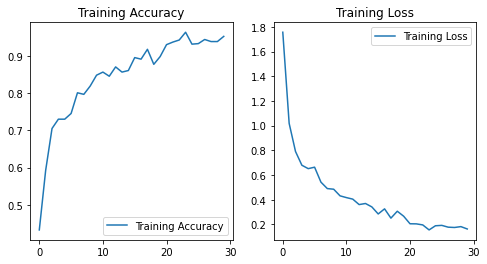

In [ ]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

1/1 [==============================] - 1s 1s/step
Happy


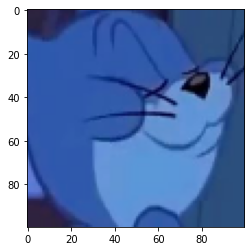

In [ ]:
img_size=100
rp = []
def test(path):
  img = cv2.imread(path)
  img = cv2.resize(img,(img_size,img_size))
  plt.imshow(img)
  rp.append(img)
  image = np.array(rp)
  #print(image.shape)
  label = Emodel.predict(image)
  la = [np.argmax(i) for i in label]
  print(categories[la[0]])
test('/content/Emotion_Detection/Data/Happy/Capture112.JPG')

**Face Detection Module**

In [ ]:
import imutils
def sliding_window(image, step, ws):
	# slide a window across the image
	for y in range(0, image.shape[0] - ws[1], step):
		for x in range(0, image.shape[1] - ws[0], step):
			# yield the current window
			yield (x, y, image[y:y + ws[1], x:x + ws[0]])

In [ ]:
def image_pyramid(image, scale=1.5, minSize=(150, 150)):
	# yield the original image
	yield image
	# keep looping over the image pyramid
	while True:
		# compute the dimensions of the next image in the pyramid
		w = int(image.shape[1] / scale)
		image = imutils.resize(image, width=w)
		# if the resized image does not meet the supplied minimum
		# size, then stop constructing the pyramid
		if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
			break
		# yield the next image in the pyramid
		yield image

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import imagenet_utils
from imutils.object_detection import non_max_suppression

import numpy as np
import argparse
import imutils
import time
import cv2

from google.colab.patches import cv2_imshow
import tensorflow as tf

In [ ]:

def decode(pred):
  l = [np.argmax(lab) for lab in pred]
  p = [np.max(lab) for lab in pred]
  siz = pred.shape[0]
  zoro = []
  for i in range(0,siz):
    zoro.append([l[i],p[i]])
  return zoro


In [ ]:
img_size=100
def test(path):
  rp = []
  img = cv2.imread(path)
  img = cv2.resize(img,(img_size,img_size))
  plt.imshow(img)
  rp.append(img)
  image = np.array(rp)
  #print(image.shape)
  label = Emodel.predict(image)
  la = [np.argmax(i) for i in label]
  print("Emotion=",categories[la[0]])
#test('/content/Emotion_Detection/Data/Suprised/S11.PNG')

In [59]:
def object_detect(img_path):
  WIDTH = 500
  PYR_SCALE = 1.2
  WIN_STEP = 4
  ROI_SIZE = [90,80]
  INPUT_SIZE = (80, 80)

  orig = cv2.imread(img_path)
  orig = cv2.resize(orig, (400,220))
  (H, W) = orig.shape[:2]

  pyramid = list(image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE))
  print(len(pyramid))
  rois = []
  locs = []

  for image in pyramid:
    #determine the scale factor between the *original* image
	  # dimensions and the *current* layer of the pyramid
    scale = W / float(image.shape[1])
    # for each layer of the image pyramid, loop over the sliding
    # window locations
    for (x, y, roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
      # scale the (x, y)-coordinates of the ROI with respect to the
		  # *original* image dimensions
      x = int(x * scale)
      y = int(y * scale)
      w = int(ROI_SIZE[0] * scale)
      h = int(ROI_SIZE[1] * scale)
      # take the ROI and preprocess it so we can later classify
		  # the region using Keras/TensorFlow
      roi = cv2.resize(roiOrig, INPUT_SIZE)
      roi = img_to_array(roi)
      roi = preprocess_input(roi)
      # update our list of ROIs and associated coordinates
      rois.append(roi)
      locs.append((x, y, x + w, y + h))

  rois = np.array(rois, dtype="float32")
  preds = model.predict(rois)
  preds = decode(preds)
  labels = {}

  # loop over the predictions
  for (i, p) in enumerate(preds):
     #grab the prediction information for the current ROI
    (label, prob) = p
    	# filter out weak detections by ensuring the predicted probability
	    # is greater than the minimum probability
    if prob >= 0.96 and label!=0:
      # grab the bounding box associated with the prediction and
		  # convert the coordinates
      box = locs[i]
      # grab the list of predictions for the label and add the
		  # bounding box and probability to the list
      L = labels.get(label, [])
      L.append((box, prob))
      labels[label] = L
  
  # loop over the labels for each of detected objects in the image
  for label in labels.keys():
    print("[INFO] showing results for '{}'".format(label))
    
    clone1 = orig.copy()
    boxes = np.array([p[0] for p in labels[label]])
    proba = np.array([p[1] for p in labels[label]])
    selected_indices = tf.image.non_max_suppression(boxes, proba,max_output_size=1, iou_threshold=0.6)
    boxes = tf.gather(boxes, selected_indices)
    #boxe = [boxes[np.argmax(proba)]]
    #print(boxe)
    #boxes = non_max_suppression(boxes, proba)
    #print(boxes)
    for (startX, startY, endX, endY) in boxes:
      #print(startX," ",startY," ",endX," ",endY)
      cv2.rectangle(clone1, (int(startX),int(startY)), (int(endX), int(endY)),(0,0, 200), 2)
      
    img = tf.image.crop_to_bounding_box(
    orig, offset_height=int(startY), offset_width=int(startX), 
    target_height=abs(int(startY)-int(endY)), target_width=abs(int(startX)-int(endX))
    )

    roi_cropped = orig[int(startY):int(startY+abs(startY-endY)), int(startX):int(startX+abs(endX-startX))]
    #print(int(startX),":",int(startY+abs(startY-endY)),":", int(startY),":",int(startX+abs(endX-startX)))
    #show cropped image 
    #cv2.imshow("ROI", roi_cropped)

    Image_name = "/content/predict_Emotion.jpg"
    cv2.imwrite(Image_name,roi_cropped)
    
    #plt.imshow(img)
    #img = cv2.resize(img,(100,100))
    #cv2.imwrite(Image_name,img)
    cv2_imshow( clone1)
    #cv2.putText(clone1,'Moth Detected',(x+w+10,y+h),0,0.9,(0,255,0))
    
    cv2.waitKey(0)

    print("Face Probabilty=",proba[selected_indices[0]])
    test(Image_name)


6
181/181 [==============================] - 4s 21ms/step
[INFO] showing results for '1'


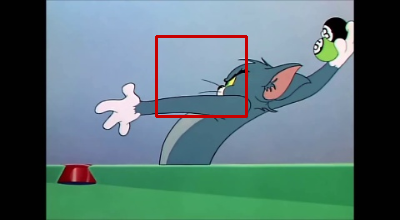

Face Probabilty= 0.99999976
1/1 [==============================] - 0s 30ms/step
Emotion= Angry
6
181/181 [==============================] - 4s 20ms/step
[INFO] showing results for '1'


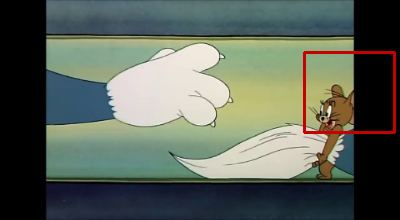

Face Probabilty= 0.999887
1/1 [==============================] - 0s 32ms/step
Emotion= Happy


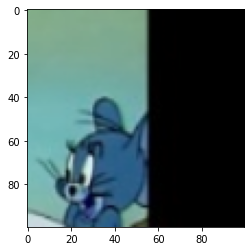

In [62]:
object_detect('/content/content/Test_480_280/frame0.jpg')
object_detect('/content/content/Test_480_280/frame60.jpg')

In [ ]:
'''

for i in range(35,46):
  filename='/content/content/Test_data/Frames' + str(i) + '.jpg'
  print(filename)
  object_detect(filename)
  


'''

"\n\nfor i in range(35,46):\n  filename='/content/content/Test_data/Frames' + str(i) + '.jpg'\n  print(filename)\n  object_detect(filename)\n  \n\n\n"

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# #Run to download a folder as zip File
# !zip -r /content/video_data.zip /content/video_data
# !zip -r /content/video_data1.zip /content/video_data1